#**04 -Multi-variable Linear Regression**

# 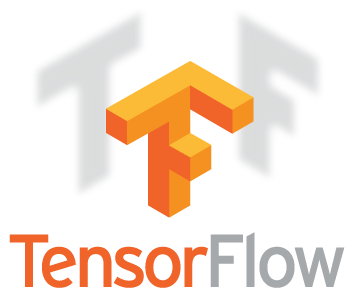

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.4.0


#**Multi-variable linear regression**
predicting exam score -regression using three inputs (x1, x2, x3)

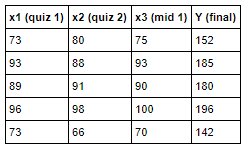

Test Scores for General Psychology(https://goo.gl/g2T8Kp)

#**Matrix multiplication**
##**dot product(=scalar product, 내적)**

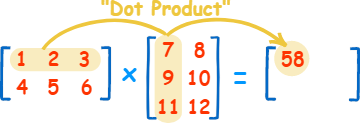

https://www.mathsisfun.com/algebra/matrix-multiplying.html

#**Multi-feature regression**

###**Hypothesis**
image.png

#**Hypothesis using matrix**

image.png


image.png

(W, X 는 matrix)

#**Hypothesis without b**

image.png

#**Hypothesis using matrix**

###**Many x instances**

image.png

5는 데이터(instance)의 수, 3은 변수(feature)의 수, 1은 결과

#**Hypothesis using matrix (n output)**

image.png

* n은 데이터(instance)의 개수, 2는 결과 값의 개수로 주어진다.
* 이때, W[?, ?] => [3, 2]

#**WX vs XW**
###**Theory (Lecture):**

image.png

###**Tensorflow(Implementation) : **

image.png


#**Simple Example (2 variables)**

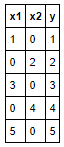

In [2]:
tf.random.set_seed(0) # for reproducibility (똑같은 값을 재현하기 위하여)

In [3]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

W1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

learning_rate = tf.Variable(0.001)

for i in range(1000+1):
  with tf.GradientTape() as tape:
    hypothesis = W1 * x1_data + W2 * x2_data +b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
  W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
  W1.assign_sub(learning_rate * W1_grad)
  W2.assign_sub(learning_rate * W2_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 50 == 0:
    print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))

    0 | 335.280823 |    -4.0663 |     1.1220 |  -6.065215
   50 |  76.037262 |    -0.8001 |     1.6209 |  -4.978779
  100 |  18.959263 |     0.7151 |     1.8781 |  -4.429109
  150 |   6.310240 |     1.4125 |     2.0104 |  -4.134423
  200 |   3.445082 |     1.7284 |     2.0768 |  -3.961648
  250 |   2.743659 |     1.8667 |     2.1075 |  -3.847750
  300 |   2.525401 |     1.9225 |     2.1184 |  -3.762738
  350 |   2.417754 |     1.9402 |     2.1181 |  -3.692262
  400 |   2.337300 |     1.9403 |     2.1114 |  -3.629400
  450 |   2.264998 |     1.9325 |     2.1008 |  -3.570778
  500 |   2.196328 |     1.9213 |     2.0881 |  -3.514729
  550 |   2.130126 |     1.9085 |     2.0741 |  -3.460409
  600 |   2.066037 |     1.8953 |     2.0595 |  -3.407385
  650 |   2.003917 |     1.8819 |     2.0444 |  -3.355424
  700 |   1.943679 |     1.8686 |     2.0293 |  -3.304398
  750 |   1.885258 |     1.8555 |     2.0141 |  -3.254230
  800 |   1.828595 |     1.8425 |     1.9990 |  -3.204873
  850 |   1.77

#**Simple Example (2 variables with Matrix)**


In [4]:
x_data = [
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]
]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform((1, 2), -1.0, -1.0))
b = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))

learning_rate = tf.Variable(0.001)

for i in range(1000+1):
  with tf.GradientTape() as tape:
    hypothesis = tf.matmul(W, x_data) + b #(1, 2) * (2, 5) = (1, 5)
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

  if i % 50 == 0:
    print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], b.numpy()[0]))


    0 |  56.621788 |    -0.9685 |    -0.9817 |  -0.958987
   50 |  15.266266 |     0.1124 |    -0.2601 |  -0.452477
  100 |   4.546343 |     0.5996 |     0.1865 |  -0.187759
  150 |   1.502056 |     0.8155 |     0.4661 |  -0.046355
  200 |   0.543129 |     0.9089 |     0.6429 |   0.030774
  250 |   0.210421 |     0.9477 |     0.7555 |   0.073577
  300 |   0.085992 |     0.9627 |     0.8277 |   0.097573
  350 |   0.037041 |     0.9678 |     0.8743 |   0.110995
  400 |   0.017163 |     0.9691 |     0.9044 |   0.118328
  450 |   0.008921 |     0.9690 |     0.9241 |   0.122077
  500 |   0.005442 |     0.9687 |     0.9370 |   0.123679
  550 |   0.003937 |     0.9684 |     0.9455 |   0.123976
  600 |   0.003257 |     0.9683 |     0.9513 |   0.123474
  650 |   0.002923 |     0.9683 |     0.9552 |   0.122481
  700 |   0.002736 |     0.9685 |     0.9579 |   0.121188
  750 |   0.002613 |     0.9688 |     0.9599 |   0.119714
  800 |   0.002517 |     0.9691 |     0.9614 |   0.118133
  850 |   0.00

#**Hypothesis without b**


In [5]:
x_data = [
    [1., 1., 1., 1., 1.],
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0]
]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform((1, 3), -1.0, 1.0)) #[1, 3] 으로 변경하고 bias 삭제

learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate)

for i in range(1000+1):
  with tf.GradientTape() as tape:
    hypothesis = tf.matmul(W, x_data)
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  grads = tape.gradient(cost, [W])
  optimizer.apply_gradients(grads_and_vars=zip(grads, [W]))
  if i % 50 == 0:
    print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.4f}".format(i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], W.numpy()[0][2]))

    0 |  16.019751 |    -0.1985 |     0.3424 |    -0.6835
   50 |   5.635924 |     0.0582 |     0.6809 |    -0.1215
  100 |   2.141112 |     0.1997 |     0.8238 |     0.2356
  150 |   0.862825 |     0.2786 |     0.8808 |     0.4641
  200 |   0.367091 |     0.3227 |     0.9015 |     0.6112
  250 |   0.167513 |     0.3468 |     0.9074 |     0.7064
  300 |   0.085210 |     0.3593 |     0.9082 |     0.7684
  350 |   0.050615 |     0.3649 |     0.9074 |     0.8090
  400 |   0.035731 |     0.3663 |     0.9067 |     0.8359
  450 |   0.029064 |     0.3651 |     0.9063 |     0.8539
  500 |   0.025846 |     0.3624 |     0.9064 |     0.8661
  550 |   0.024085 |     0.3587 |     0.9069 |     0.8746
  600 |   0.022948 |     0.3544 |     0.9076 |     0.8807
  650 |   0.022085 |     0.3497 |     0.9086 |     0.8852
  700 |   0.021348 |     0.3449 |     0.9097 |     0.8887
  750 |   0.020676 |     0.3400 |     0.9109 |     0.8916
  800 |   0.020042 |     0.3350 |     0.9121 |     0.8940
  850 |   0.01

#**Custom Gradient**

* tf.train.GradientDescentOptimizer(): optimizer
* optimizer.apply_gradients(): update

In [6]:
#Multi-variable linear regression()

X = tf.constant([[1., 2.],
                [3., 4.]])
y = tf.constant([[1.5], [3.5]])

W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal((1,)))

#Create an Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

n_epoch = 1000+1
print("epoch | cost")

for i in range(n_epoch):
  #Use tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    y_pred = tf.matmul(X, W) + b
    cost = tf.reduce_mean(tf.square(y_pred - y))

  #calculates the gradients of the loss
  grads = tape.gradient(cost, [W, b])

  #updates parameters (W and b)
  optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))

  if i % 50 ==0:
    print("{:5} | {:10.6f}".format(i, cost.numpy()))

epoch | cost
    0 |  21.726822
   50 |   0.258689
  100 |   0.176868
  150 |   0.120926
  200 |   0.082678
  250 |   0.056528
  300 |   0.038649
  350 |   0.026424
  400 |   0.018067
  450 |   0.012352
  500 |   0.008445
  550 |   0.005774
  600 |   0.003948
  650 |   0.002699
  700 |   0.001845
  750 |   0.001262
  800 |   0.000863
  850 |   0.000590
  900 |   0.000403
  950 |   0.000276
 1000 |   0.000189


#**Predicting exam score**

regression using three inputs(x1, x2, x3)

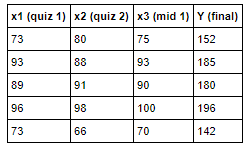

In [7]:
tf.random.set_seed(0) # for reproducibility

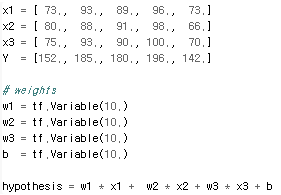


In [8]:
#data and label
x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

#weights
w1 = tf.Variable(10.)
w2 = tf.Variable(10.)
w3 = tf.Variable(10.)
b  = tf.Variable(10.)

learning_rate = 0.000001

for i in range(1000+1):
  #tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    hypothesis = w1  * x1 + w2 * x2 + w3 * x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
  
  #calculates the gradients of the cost
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

  #update w1, w2, w3 and b
  w1.assign_sub(learning_rate * w1_grad)
  w2.assign_sub(learning_rate * w2_grad)
  w3.assign_sub(learning_rate * w3_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 50 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 | 5793889.5000
   50 |   64291.1562
  100 |     715.2903
  150 |       9.8461
  200 |       2.0152
  250 |       1.9252
  300 |       1.9210
  350 |       1.9177
  400 |       1.9145
  450 |       1.9114
  500 |       1.9081
  550 |       1.9050
  600 |       1.9018
  650 |       1.8986
  700 |       1.8955
  750 |       1.8923
  800 |       1.8892
  850 |       1.8861
  900 |       1.8829
  950 |       1.8798
 1000 |       1.8767


#**Multi-variable linear regression(1)**

* random 초기화: tf.random_normal()

In [9]:
#data and label
x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

#weights
w1 = tf.Variable(tf.random.normal((1,)))
w2 = tf.Variable(tf.random.normal((1,)))
w3 = tf.Variable(tf.random.normal((1,)))
b  = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

for i in range(1000+1):
  #tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    hypothesis = w1  * x1 + w2 * x2 + w3 * x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
  
  #calculates the gradients of the cost
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

  #update w1, w2, w3 and b
  w1.assign_sub(learning_rate * w1_grad)
  w2.assign_sub(learning_rate * w2_grad)
  w3.assign_sub(learning_rate * w3_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 50 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 |   11325.9121
   50 |     135.3618
  100 |      11.1817
  150 |       9.7940
  200 |       9.7687
  250 |       9.7587
  300 |       9.7489
  350 |       9.7389
  400 |       9.7292
  450 |       9.7194
  500 |       9.7096
  550 |       9.6999
  600 |       9.6903
  650 |       9.6806
  700 |       9.6709
  750 |       9.6612
  800 |       9.6517
  850 |       9.6421
  900 |       9.6325
  950 |       9.6229
 1000 |       9.6134


#**Multi-variable linear regression (2)**

* Matrix 사용

In [10]:
#data, X1, X2, X3, Y
data = np.array([
   [ 73.,  80.,  75., 152. ],
   [ 93.,  88.,  93., 185. ],
   [ 89.,  91.,  90., 180. ],
   [ 96.,  98., 100., 196. ],
   [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

#slice data
X = data[:, :-1]
y = data[:, [-1]]

W = tf.Variable(tf.random.normal((3, 1)))
b = tf.Variable(tf.random.normal((1, )))

learning_rate = 0.000001

#hypothesis, prediction function
def predict(X):
  return tf.matmul(X, W) + b

print("epoch | cost")

n_epochs = 2000
for i in range(n_epochs +1):
  #tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean(tf.square(predict(X) - y))

  #calculates the gradients of the loss
  W_grad, b_grad = tape.gradient(cost, [W, b])

  #updates parameters (W and b)
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print("{:5} | {:10.4f}".format(i, cost.numpy()))


epoch | cost
    0 |  5455.5889
  100 |    31.7444
  200 |    30.9327
  300 |    30.7893
  400 |    30.6467
  500 |    30.5053
  600 |    30.3644
  700 |    30.2241
  800 |    30.0849
  900 |    29.9462
 1000 |    29.8081
 1100 |    29.6711
 1200 |    29.5347
 1300 |    29.3990
 1400 |    29.2640
 1500 |    29.1298
 1600 |    28.9960
 1700 |    28.8632
 1800 |    28.7312
 1900 |    28.5995
 2000 |    28.4689


In [11]:
W.numpy()

array([[ 1.3685762],
       [ 2.104772 ],
       [-1.4229949]], dtype=float32)

In [12]:
b.numpy()

array([-1.1783521], dtype=float32)

In [13]:
tf.matmul(X, W) + b

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[160.38489],
       [178.98067],
       [184.08965],
       [194.17314],
       [138.03304]], dtype=float32)>

#**Predict**

In [14]:
Y #labels, 실제값

[152.0, 185.0, 180.0, 196.0, 142.0]

In [15]:
predict(X).numpy()#prediction, 예측값

array([[160.38489],
       [178.98067],
       [184.08965],
       [194.17314],
       [138.03304]], dtype=float32)

In [16]:
#새로운 데이터에 대한 예측
predict([
         [ 89.,  95.,  92.],
         [ 84.,  92.,  85.]
]).numpy()

array([[189.66275],
       [186.46652]], dtype=float32)